# Johan Knarreborg - Analysis

Noter: 

styr på hvilke kører der tages med. Drivers2 osv. Måske bare slette kørere med under 40 ræs til sidst...? 


## Formula One - 50 years of racing but who has been the best driver..?

Is the best driver the one that has scored the most points? Has won the most races? Or the one to go fastest around the most tracks? 
Over the years formula one cars has evolved. New tracks has come and gone and the point system has changed. This makes it difficult to compare these question directly between all of the drivers. In this analysis we will try to seperate the drivers performance from the cars performance, the specific track and other variables not related to the drivers performance. 

Things we will be looking at are: 

- Most average points scored per race 

- Average finish position 

- Best at getting pole position 

- Least crashes per race 

- Best Performance compared to team mate 

- Most races  


For each of these parameters we will give the top ten drivers a score from 10 to 1. We will then be able to sum these scores and see who is the overall best driver. 

Since drivers who has only participated in few races would be able to score well in some of these parameters, we will only look at drivers who has participated in more than 40 races, which is around two seasons.


In [1]:
#Importing libraries 
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
from analysis1_pipeline import pipeline
from datetime import datetime 

#running my pipeline function
pipeline("../data/raw/","../data/processed/Johan_Processed/")

#Importing the raw data and substituing the '\N' values for NaN. 
circuits = pd.read_csv("../data/processed/Johan_Processed/circuits.csv")
drivers = pd.read_csv("../data/processed/Johan_Processed/drivers.csv")
results = pd.read_csv("../data/processed/Johan_Processed/results.csv")
seasons = pd.read_csv("../data/processed/Johan_Processed/seasons.csv")
status = pd.read_csv("../data/processed/Johan_Processed/status.csv")
lap_times = pd.read_csv("../data/processed/Johan_Processed/lap_times.csv")
pit_stops = pd.read_csv("../data/processed/Johan_Processed/pit_stops.csv")
qualifying = pd.read_csv("../data/processed/Johan_Processed/qualifying.csv")
races = pd.read_csv("../data/processed/Johan_Processed/races.csv")
constructors = pd.read_csv("../data/processed/Johan_Processed/constructors.csv")
constructor_results = pd.read_csv("../data/processed/Johan_Processed/constructor_results.csv")
constructor_standings = pd.read_csv("../data/processed/Johan_Processed/constructor_standings.csv")
driver_standings = pd.read_csv("../data/processed/Johan_Processed/driver_standings.csv")
results_races =    pd.read_csv("../data/processed/Johan_Processed/results_races.csv") 

#before 2010 a maximum of 10 points were awarded to the winner and after it has been 25.
#To normalize the points in a quick way we multiply all points before 2010 with 2.5.

#adding refs to results_races 
results_races = pd.merge(results_races,drivers, on = "driverId", how = "left")

#normalize this to the maximum nuber of point given each year.
results_races.loc[results_races["year"]<2010, "points"]=results_races["points"]*2.5

#making the scoreboard for the individual drivers: 
overall_driver = drivers[["driverId","driverRef"]].copy() 
overall_driver["points"] =0 


In [2]:
drivers2 = results_races[["driverId"]].copy()
drivers2 = drivers2.groupby("driverId").size().reset_index(name="size")
drivers2 = drivers2.drop(drivers2[drivers2["size"] < 40 ].index)

### A first look at differences between drivers
To get some insights into how much of a difference there is between the drivers we will look at how much difference there is between the amount of point that drivers score. 


Total amount of drivers that have driven in formula one is: 177

The amount of drivers that have scored more than zero points are: 173

Variance for average amount of points scored is: 8.534527512952016

A boxplot of the average points scored by each diver: 


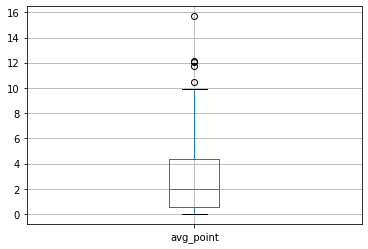

In [3]:
#Looking at the variance between the average amount of points scored per race for each driver and showing a boxplot. 
avg_point=pd.DataFrame(columns=["avg_point","driverId"])
b=0
for i in drivers2["driverId"]:
    driver_points = results_races[results_races["driverId"]==i]
    avg_point.loc[b]=[driver_points["points"].mean(),i]
    b = b+1
box_plot = pd.DataFrame(avg_point["avg_point"]).boxplot()
xlabel=""
print("Total amount of drivers that have driven in formula one is:",len(avg_point))
print("")
print("The amount of drivers that have scored more than zero points are:",len(avg_point[avg_point["avg_point"]!=0]))
print("")
print("Variance for average amount of points scored is:", avg_point["avg_point"].var())
print("")
print("A boxplot of the average points scored by each diver: ")

This variance shows that there is a relatively large spread in the average amount of points scored by the drivers in formula one.

In the boxplot it is clear that the vast majority of drivers score few points. And that few drivers out of the 853 drivers have scored a large amount of points on average. However it is hard too see exactly how many. Therefore, we do a boxplot of the drivers who have scored more than 1 point on average. 

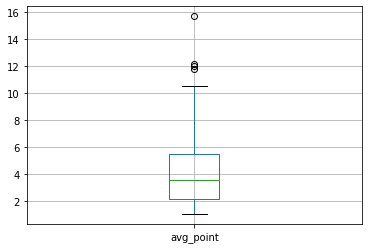

In [4]:
#doing a boxplot for all drivers who has scored more than 0 point on average
box_plot2 = pd.DataFrame(avg_point["avg_point"][avg_point["avg_point"]>1]).boxplot()

We now see that only a handfull of people are outliers in this boxplot, with one driver domininating the others with more than 15 points on average. 

In [5]:
top_driver = pd.merge(avg_point,drivers[["driverId","driverRef"]],on="driverId",how="left").sort_values(by="avg_point",ascending = False)
top_driver.head(1)

,avg_point,driverId,driverRef
0,15.68,1.0,hamilton


The driver that scored the most points on average is Lewis Hamilton who is driving for mercedes. 
Lets see who the top ten drivers on this parameter are: 

In [6]:
top_driver.head(10)

,avg_point,driverId,driverRef
0,15.680000,1.0,hamilton
15,12.117978,20.0,vettel
152,12.031897,579.0,fangio
22,11.751623,30.0,michael_schumacher
166,10.500000,830.0,max_verstappen
63,9.882426,117.0,prost
162,9.662651,822.0,bottas
55,9.475309,102.0,senna
139,9.383562,373.0,clark
130,9.000000,328.0,stewart


In [7]:
#giving the top ten drivers of this parameter points from 1-10. 
p = 10
for i in top_driver["driverId"][0:10]: 
    overall_driver.loc[overall_driver["driverId"]==i,"points"]=  overall_driver.loc[overall_driver["driverId"]==i,"points"] +p 
    p = p-1 


---

#### Average finish position for each driver
Another way to normalize this is to look at the average finishing position of each driver. 

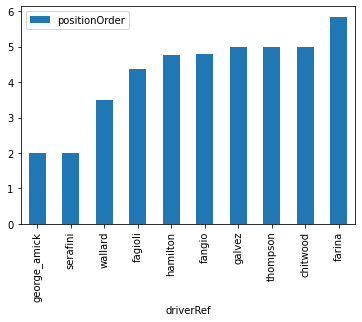

In [19]:
driver_finish = results_races[["driverId","driverRef","positionOrder"]].copy() 
driver_finish_mean = driver_finish.groupby("driverId").mean().reset_index()
driver_finish_mean = pd.merge(driver_finish_mean,drivers[["driverId","driverRef"]], on="driverId",how="left").sort_values(by="positionOrder",ascending=True)
#driver_finish_mean.head(10)
ax2 = driver_finish_mean[0:10].plot.bar(x="driverRef",y="positionOrder")

In [9]:
#giving the top ten drivers of this parameter points from 1-10. 
p = 10
for i in driver_finish_mean["driverId"][0:10]: 
    overall_driver.loc[overall_driver["driverId"]==i,"points"]=  overall_driver.loc[overall_driver["driverId"]==i,"points"] +p 
    p = p-1 

Here we see that this favours driver from ealier seasons. 


---

### Who is the best driver during qualifying

To get pole position you need to set the fastest lap around the track during qualifying. 

In [10]:

quali_driver = qualifying.copy()
quali_driver_mean = quali_driver.groupby("driverId").mean().reset_index()[["driverId","position"]]
quali_driver_mean = quali_driver_mean.sort_values(by="position",ascending = True)
quali_driver_mean.head(10)

,driverId,position
99,102,1.000000
0,1,3.425455
92,95,4.833333
19,20,5.372180
69,71,5.372881
29,30,5.666667
75,77,5.760870
131,822,5.819277
139,830,5.859375
30,31,6.031250


In [11]:
#giving the top ten drivers of this parameter points from 1-10. 
p = 10
for i in quali_driver_mean["driverId"][0:10]: 
    overall_driver.loc[overall_driver["driverId"]==i,"points"]=  overall_driver.loc[overall_driver["driverId"]==i,"points"] +p 
    p = p-1 



---

### Who is better at finishing? 
When driving one of your goals is to not crash and arrive to your destination. While the same cannot be directly tranferred to racing it is a factor we could take a look at. 

We will see who finish the largest amount of the races that they participate in. 
It should be noted that this favours more recent drivers since the cars has become more reliable. 

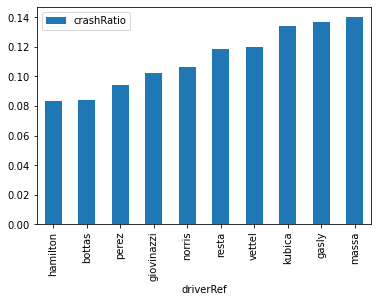

In [12]:
driver_crash = drivers[["driverId","driverRef"]].copy()
driver_crash["crashRatio"]=100 

for i in drivers2["driverId"]: 
    if np.size(results_races["positionText"][results_races["driverId"]==i])>15: 
        crashRatio = np.size(results_races["positionText"][results_races["driverId"]==i][results_races["positionText"]=="R"])/np.size(results_races["positionText"][results_races["driverId"]==i])
        driver_crash.loc[driver_crash["driverId"]==i,"crashRatio"]=crashRatio
driver_crash = driver_crash.sort_values(by="crashRatio")  
ax = driver_crash[0:10].plot.bar(x="driverRef",y="crashRatio")

In [13]:
#giving the top ten drivers of this parameter points from 1-10. 
p = 10
for i in driver_crash["driverId"][0:10]: 
    overall_driver.loc[overall_driver["driverId"]==i,"points"]=  overall_driver.loc[overall_driver["driverId"]==i,"points"] +p 
    p = p-1 


---

### Best driver compared to team mate 
Drivers has over the years been competing in pairs with almost identical cars from the same constructor. We will therefore take a look at what driver has outperformed his own team mate the most. 

,driverId,overTeammate,underTeammate,ratio
3,4.0,222,101,2.198020
55,102.0,108,54,2.000000
166,830.0,83,45,1.844444
22,30.0,198,110,1.800000
15,20.0,168,99,1.696970
0,1.0,171,104,1.644231
63,117.0,124,78,1.589744
152,579.0,35,23,1.521739
130,328.0,59,41,1.439024
139,373.0,43,30,1.433333


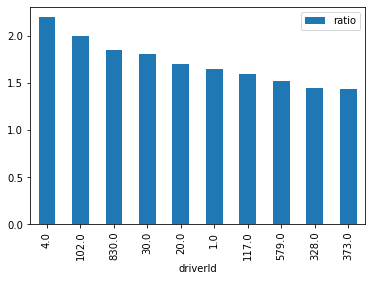

In [14]:
driver_ratio = pd.DataFrame(columns=["driverId"])
driver_ratio["driverId"] =top_driver["driverId"].copy()
driver_ratio["overTeammate"]=0
driver_ratio["underTeammate"]=0


for i in top_driver["driverId"][0:20]: 
    over = 0 
    under = 0
    for b in results_races["raceId"][results_races["driverId"]==i]: 
        constructor = results_races[results_races["raceId"]==b]
        constructor= list(constructor.loc[results_races["driverId"]==i,"constructorId"])[0]
        position = results_races[results_races["raceId"]==b]
        position = position.loc(axis=0)[results_races["constructorId"]==constructor].sort_values(by="positionOrder",ascending=True)
        if list(position["driverId"])[0]==i: 
            over = over+1
        else: 
            under = under +1 
        driver_ratio[driver_ratio["driverId"]==i]=[i,over,under]

driver_ratio["ratio"]=driver_ratio["overTeammate"]/driver_ratio["underTeammate"]
driver_ratio = driver_ratio.sort_values(by="ratio",ascending = False)
ax = driver_ratio[0:10].plot.bar(x="driverId",y="ratio")
driver_ratio.head(10)

In [15]:
#giving the top ten drivers of this parameter points from 1-10. 
p = 10
for i in driver_ratio["driverId"][0:10]: 
    overall_driver.loc[overall_driver["driverId"]==i,"points"]=  overall_driver.loc[overall_driver["driverId"]==i,"points"] +p 
    p = p-1 


--- 

### Most races 

One thing is being a good at driving a race car. However, you also need to be good at finding team and staying on that team. We will therefore look at who has been in the most races. 


In [16]:
driver_races = results_races[["driverId"]].copy()
driver_races = driver_races.groupby("driverId").size().reset_index().sort_values(by=0,ascending=False)
driver_races = pd.merge(driver_races,drivers[["driverId","driverRef"]], on="driverId",how="left")
driver_races.head(10)

,driverId,0,driverRef
0,8,341,raikkonen
1,22,326,barrichello
2,4,323,alonso
3,18,309,button
4,30,308,michael_schumacher
5,1,275,hamilton
6,13,271,massa
7,20,267,vettel
8,119,257,patrese
9,15,256,trulli


In [17]:
#giving the top ten drivers of this parameter points from 1-10. 
p = 10
for i in driver_races["driverId"][0:10]: 
    overall_driver.loc[overall_driver["driverId"]==i,"points"]=  overall_driver.loc[overall_driver["driverId"]==i,"points"] +p 
    p = p-1 

--- 

## The overall score is thereby: 

In [18]:
overall_driver = overall_driver.sort_values(by="points",ascending = False)
overall_driver.head(10)


,driverId,driverRef,points
0,1,hamilton,45
19,20,vettel,29
29,30,michael_schumacher,25
101,102,senna,22
3,4,alonso,18
579,579,fangio,16
821,822,bottas,16
829,830,max_verstappen,16
591,591,george_amick,10
7,8,raikkonen,10
